# Regresión (con pandas y pyplot)

## EJEMPLO DE APRENDIZAJE SUPERVISADO

In [7]:
# marisa me dice que el primer import no es necesario porque estamos utilizando pandas
import csv  # moculo para leer diferentes formatos de archivos, entre ellos separados por ',' comas
            # como analista de datos te enfrentaras a muchos tipos de formatos, separados por ';', '|', tabuladores 
            # y lo que se le acurre a cada quien, siempre presta atencion a ello 
import pandas as pd  # recuerdas que puedes usar los alias que quieras para las librerias ? es costumbre llamara 'pd' a pandas
import numpy as np   # una genial implementacion de algebra lineal 
import matplotlib.pyplot as plt  # tambien es costumbre llamar 'plt' a el modulo 'pyplot' de 'matplotlib'

Aprovechando que estamos familiarizadas con el conjunto de datos de ciudades y sus temperaturas veamos si existe una __relación
lineal__ entre las coordenadas, individualmente, con la temperatura

In [18]:
cities = pd.read_csv('Cities.csv') # leemos nuestra bendita fuente de informacion
                                   # recuerda: en la vida real, pocas veces tu data set esta completo, limpio y ordenado

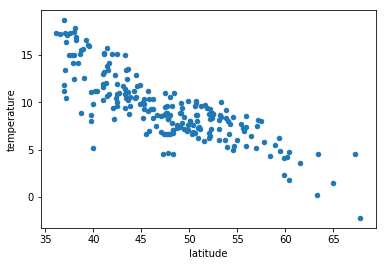

In [19]:
# Recordemos que siempre es bueno un EDA sencillito 
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

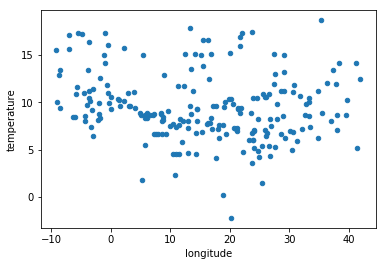

In [11]:
cities.plot.scatter(x='longitude', y='temperature')
plt.show()

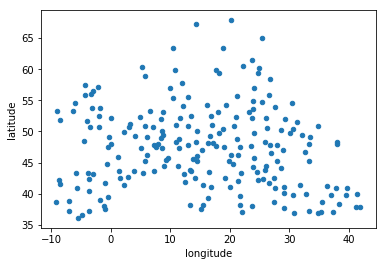

In [12]:
# Scatter plot de nuestras variables de interes
cities.plot.scatter(x='longitude', y='latitude')
plt.show()

In [13]:
train = cities # entrenemos con todas las ciudades
# consulta para revisar si las ciudades (es como pedirle un head, pero estas trabajando con todas las ciudades)
train.city.values[0:6] # las primeras 6 ciudades

array(['Aalborg', 'Aberdeen', 'Abisko', 'Adana', 'Albacete', 'Algeciras'],
      dtype=object)

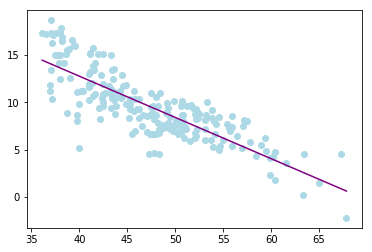

In [14]:
plt.scatter(train.latitude, train.temperature, color='lightblue') # elegimos la latitud porque presenta mayor relacion lineal
# a es la ordenada del origen y b es la pendiente ... polinomisos de grado 1, diferente a 2 y a 3.. OJO
a,b = np.polyfit(train.latitude, train.temperature, 1) # calculo de los coeficientes ordenada al origen y pendiente 
                                                       # en una sola linea
x1 = min(train.latitude) # definamos los limites de la recta para dibujarla
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='purple')
plt.show() # que opinas ? ajusta bien

# Clasificación (knn, árboles y random forest)

In [21]:
from sklearn.neighbors import KNeighborsClassifier #carguemos lo minimo y suficiente
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Como la variable original es continua definamos con ella una variable nominal con límites prudentes, en CDMX.

In [22]:
cats = [] # no por 'gatitos' sino por cat-egoria-s
for i in range(len(cities)):
    if cities.loc[i]['temperature'] < 12:
        cats.append('Frio')
    elif cities.loc[i]['temperature'] < 18:
        cats.append('Casual')
    else: cats.append('El abrazo de Monti')
cities['category'] = cats
print ("Frio:", len(cities[(cities.category == 'Frio')]))
print ("Casual:", len(cities[(cities.category == 'Casual')]))
print ("El abrazo de Monti:", len(cities[(cities.category == 'El abrazo de Monti')]))

Frio: 171
Casual: 41
El abrazo de Monti: 1


Por fin vamos a utilizar nuestro famoso concepto de conjunto *train* y *test*


In [24]:
numitems = len(cities) #tamanio de muestra
percenttrain = 0.7     # fijemos 70% como entrenamiento
numtrain = int(numitems*percenttrain) #casteo a entero
numtest = numitems - numtrain 
print ('Conjunto de Training con ', numtrain, 'observaciones')
print ('Conjunto de test con ', numtest, 'registros')
citiesTrain = cities[0:numtrain]
citiesTest = cities[numtrain:]

Conjunto de Training con  149 observaciones
Conjunto de test con  64 registros


Vamos a entrenar un clasificador con $knn$

In [25]:
features = ['longitude', 'latitude'] # variables de interes
neighbors = 8 # experimenta cambiando el unico parametro de knn
classifier = KNeighborsClassifier(neighbors) # inicializamos el clasificador
classifier.fit(citiesTrain[features], citiesTrain['category']) # una sola linea hace todos los calculos :D
predictions = classifier.predict(citiesTest[features]) # otra linea hace el ajuste sobre el test
prediccionesCorrectas=[predictions==citiesTest['category'].values] # contemos en cuantas observaciones realizamos la prediccion
                                                                   # correctamente
accuracy= np.sum(prediccionesCorrectas) / len(predictions)         # el calculo del error es una suma y una division :D
'Presición de knn: ' + str(accuracy) + ' con ' + str(neighbors)+  ' vecinos'

'Presición de knn: 0.890625 con 8 vecinos'

En este caso es sencillo, y barato, implementar una búsqueda en *grid*. ¿Dónde se da el mínimo?

In [26]:
for i in range(numtrain):
    neighbors = i+1
    classifier = KNeighborsClassifier(neighbors) # inicializamos el clasificador
    classifier.fit(citiesTrain[features], citiesTrain['category']) 
    predictions = classifier.predict(citiesTest[features]) 
    prediccionesCorrectas=[predictions==citiesTest['category'].values] 
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)         
    print('Presición de knn: ' + str(accuracy) + ' con ' + str(neighbors+1)+  ' vecinos')

Presición de knn: 0.875 con 2 vecinos
Presición de knn: 0.8125 con 3 vecinos
Presición de knn: 0.890625 con 4 vecinos
Presición de knn: 0.828125 con 5 vecinos
Presición de knn: 0.890625 con 6 vecinos
Presición de knn: 0.859375 con 7 vecinos
Presición de knn: 0.875 con 8 vecinos
Presición de knn: 0.890625 con 9 vecinos
Presición de knn: 0.90625 con 10 vecinos
Presición de knn: 0.890625 con 11 vecinos
Presición de knn: 0.875 con 12 vecinos
Presición de knn: 0.875 con 13 vecinos
Presición de knn: 0.875 con 14 vecinos
Presición de knn: 0.875 con 15 vecinos
Presición de knn: 0.859375 con 16 vecinos
Presición de knn: 0.859375 con 17 vecinos
Presición de knn: 0.84375 con 18 vecinos
Presición de knn: 0.859375 con 19 vecinos
Presición de knn: 0.859375 con 20 vecinos
Presición de knn: 0.875 con 21 vecinos
Presición de knn: 0.84375 con 22 vecinos
Presición de knn: 0.859375 con 23 vecinos
Presición de knn: 0.8125 con 24 vecinos
Presición de knn: 0.8125 con 25 vecinos
Presición de knn: 0.796875 con

Ahora vamos a entrenar un clasificador con *árboles*

In [28]:
split = 2 # parametro con el numero minimo de elementos en cada lado del nodo
dt = DecisionTreeClassifier(min_samples_split=split) #  inicializamos el arbol
dt.fit(citiesTrain[features],citiesTrain['category']) # una sola linea hace el ajuste :D 
predictions = dt.predict(citiesTest[features])  # otra linea y tenemos la predicción
prediccionesCorrectas=[predictions==citiesTest['category'].values] #calculamos de nuevo en 2 lineas el error
accuracy= np.sum(prediccionesCorrectas) / len(predictions)
print('Presición : ', accuracy)

Presición :  0.890625


Otro caso sencillo para implementar una búsqueda en *grid*. ¿Dónde se da el mínimo?

In [29]:
for i in range(int(numtrain**.5)):
    split = i+2
    dt = DecisionTreeClassifier(min_samples_split=split) #  inicializamos el arbol
    dt.fit(citiesTrain[features],citiesTrain['category']) # una sola linea hace el ajuste :D 
    predictions = dt.predict(citiesTest[features])  # otra linea y tenemos la predicción
    prediccionesCorrectas=[predictions==citiesTest['category'].values] #calculamos de nuevo en 2 lineas el error
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    print('Presición : ' + str(accuracy) +' con ' +str(split) +' elementos en cada nodo')

Presición : 0.875 con 2 elementos en cada nodo
Presición : 0.875 con 3 elementos en cada nodo
Presición : 0.875 con 4 elementos en cada nodo
Presición : 0.875 con 5 elementos en cada nodo
Presición : 0.890625 con 6 elementos en cada nodo
Presición : 0.875 con 7 elementos en cada nodo
Presición : 0.859375 con 8 elementos en cada nodo
Presición : 0.859375 con 9 elementos en cada nodo
Presición : 0.859375 con 10 elementos en cada nodo
Presición : 0.859375 con 11 elementos en cada nodo
Presición : 0.859375 con 12 elementos en cada nodo
Presición : 0.859375 con 13 elementos en cada nodo


Ya tenemos un clasificador decente con $knn$ y árboles, ¿lo podremos mejorar con *random forest*?


In [30]:
trees = 100 #numero de arboles
rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
rf.fit(citiesTrain[features],citiesTrain['category']) #otra linea que nos libra de cuentas
predictions = rf.predict(citiesTest[features]) # otra linea que se agradece
prediccionesCorrectas=[predictions==citiesTest['category'].values] #de nuevo el error consiste en solo contar :D
accuracy= np.sum(prediccionesCorrectas) / len(predictions)
print('Presición de random forest: ', accuracy)

Presición de random forest:  0.875


Finalmente implementamos otra búsqueda en *grid* porque __yolo__ ¿Dónde se da el mínimo?

In [31]:
for i in range(200):
    trees = i + 1 
    rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
    rf.fit(citiesTrain[features],citiesTrain['category']) #otra linea que nos libra de cuentas
    predictions = rf.predict(citiesTest[features]) # otra linea que se agradece
    prediccionesCorrectas=[predictions==citiesTest['category'].values] #de nuevo el error consiste en solo contar :D
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    print('Presición con Random forest: ' + str(accuracy) + ' con ' + str(trees) +' árboles')

Presición con Random forest: 0.828125 con 1 árboles
Presición con Random forest: 0.828125 con 2 árboles
Presición con Random forest: 0.859375 con 3 árboles
Presición con Random forest: 0.859375 con 4 árboles
Presición con Random forest: 0.875 con 5 árboles
Presición con Random forest: 0.890625 con 6 árboles
Presición con Random forest: 0.8125 con 7 árboles
Presición con Random forest: 0.828125 con 8 árboles
Presición con Random forest: 0.828125 con 9 árboles
Presición con Random forest: 0.890625 con 10 árboles
Presición con Random forest: 0.890625 con 11 árboles
Presición con Random forest: 0.90625 con 12 árboles
Presición con Random forest: 0.890625 con 13 árboles
Presición con Random forest: 0.875 con 14 árboles
Presición con Random forest: 0.90625 con 15 árboles
Presición con Random forest: 0.890625 con 16 árboles
Presición con Random forest: 0.875 con 17 árboles
Presición con Random forest: 0.84375 con 18 árboles
Presición con Random forest: 0.90625 con 19 árboles
Presición con Ran

Presición con Random forest: 0.890625 con 160 árboles
Presición con Random forest: 0.90625 con 161 árboles
Presición con Random forest: 0.875 con 162 árboles
Presición con Random forest: 0.875 con 163 árboles
Presición con Random forest: 0.890625 con 164 árboles
Presición con Random forest: 0.875 con 165 árboles
Presición con Random forest: 0.875 con 166 árboles
Presición con Random forest: 0.875 con 167 árboles
Presición con Random forest: 0.875 con 168 árboles
Presición con Random forest: 0.890625 con 169 árboles
Presición con Random forest: 0.875 con 170 árboles
Presición con Random forest: 0.875 con 171 árboles
Presición con Random forest: 0.875 con 172 árboles
Presición con Random forest: 0.875 con 173 árboles
Presición con Random forest: 0.890625 con 174 árboles
Presición con Random forest: 0.859375 con 175 árboles
Presición con Random forest: 0.875 con 176 árboles
Presición con Random forest: 0.875 con 177 árboles
Presición con Random forest: 0.875 con 178 árboles
Presición con 

Notas que utilizar muchos árboles no necesariamente disminuye el error de *test* 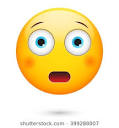 
